In [2]:
import pandas as pd
import numpy as np
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt # type: ignore
plt.style.use("ggplot")


In [3]:
import pandas as pd

df = pd.read_csv("yield_df.csv")  # replace with actual filename if it's different
print(df.head())

   Unnamed: 0     Area         Item  Year  hg/ha_yield  \
0           0  Albania        Maize  1990        36613   
1           1  Albania     Potatoes  1990        66667   
2           2  Albania  Rice, paddy  1990        23333   
3           3  Albania      Sorghum  1990        12500   
4           4  Albania     Soybeans  1990         7000   

   average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  
0                         1485.0              121.0     16.37  
1                         1485.0              121.0     16.37  
2                         1485.0              121.0     16.37  
3                         1485.0              121.0     16.37  
4                         1485.0              121.0     16.37  


In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


In [6]:
df.isnull().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(2310)

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.shape

(25932, 7)

In [11]:
df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,25932.000000,25932.000000,25932.000000,25932.000000,25932.000000
mean,2001.556455,76978.132925,1146.836688,34782.573241,20.422251
std,7.055924,84647.605552,717.391098,57228.568244,6.439402
min,1990.000000,50.000000,51.000000,0.040000,1.300000
25%,1995.000000,19996.000000,593.000000,1597.000000,16.580000
50%,2001.000000,39530.000000,1083.000000,15373.000000,21.420000
75%,2008.000000,104168.000000,1668.000000,45620.000000,26.060000
max,2013.000000,501412.000000,3240.000000,367778.000000,30.650000


In [12]:
df_numeric = df.select_dtypes(include=['number'])
correlation_matrix = df_numeric.corr()


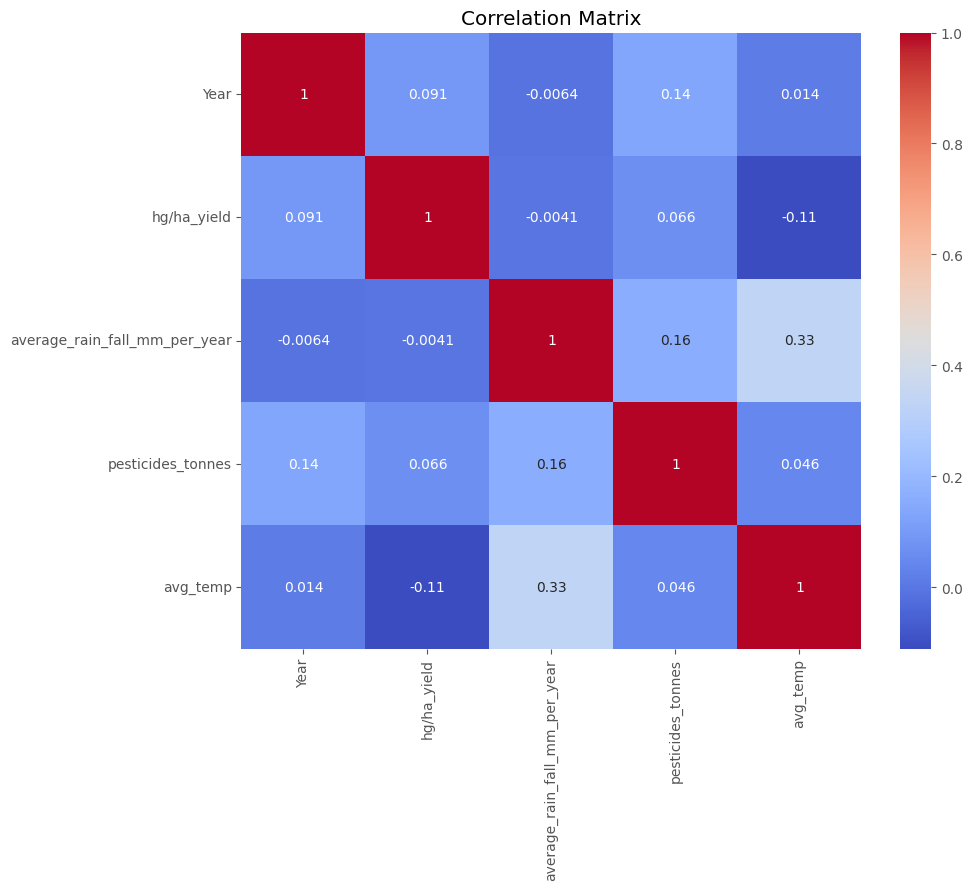

In [13]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [14]:
df.corr(numeric_only=True)


,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
Year,1.000000,0.091327,-0.006423,0.135127,0.013701
hg/ha_yield,0.091327,1.000000,-0.004067,0.065523,-0.110400
average_rain_fall_mm_per_year,-0.006423,-0.004067,1.000000,0.161483,0.333694
pesticides_tonnes,0.135127,0.065523,0.161483,1.000000,0.045577
avg_temp,0.013701,-0.110400,0.333694,0.045577,1.000000


In [15]:
#data visualization

In [16]:
len(df['Area'].unique())

101

In [17]:
len(df['Item'].unique())

10

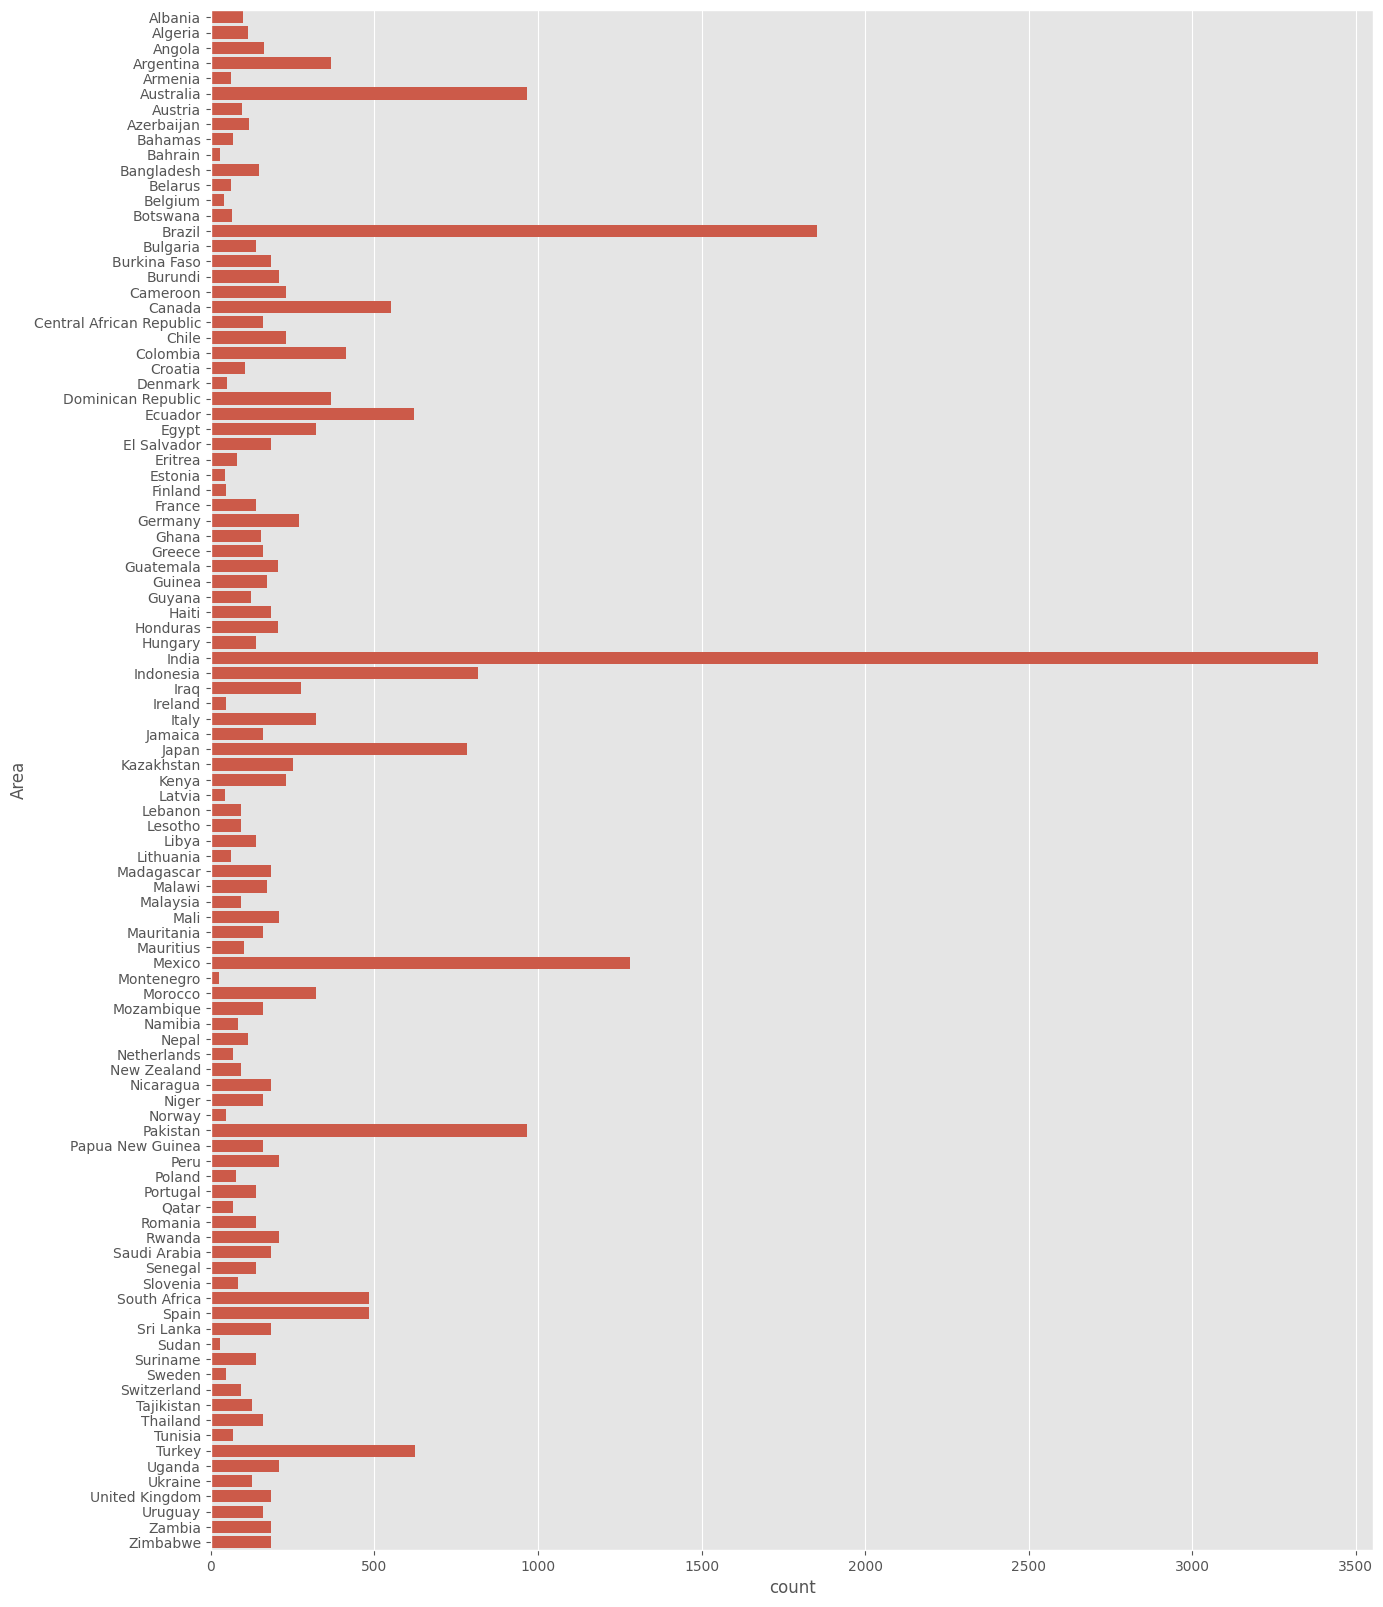

In [18]:
plt.figure(figsize=(15,20))
sns.countplot(y= df['Area'])
plt.show()

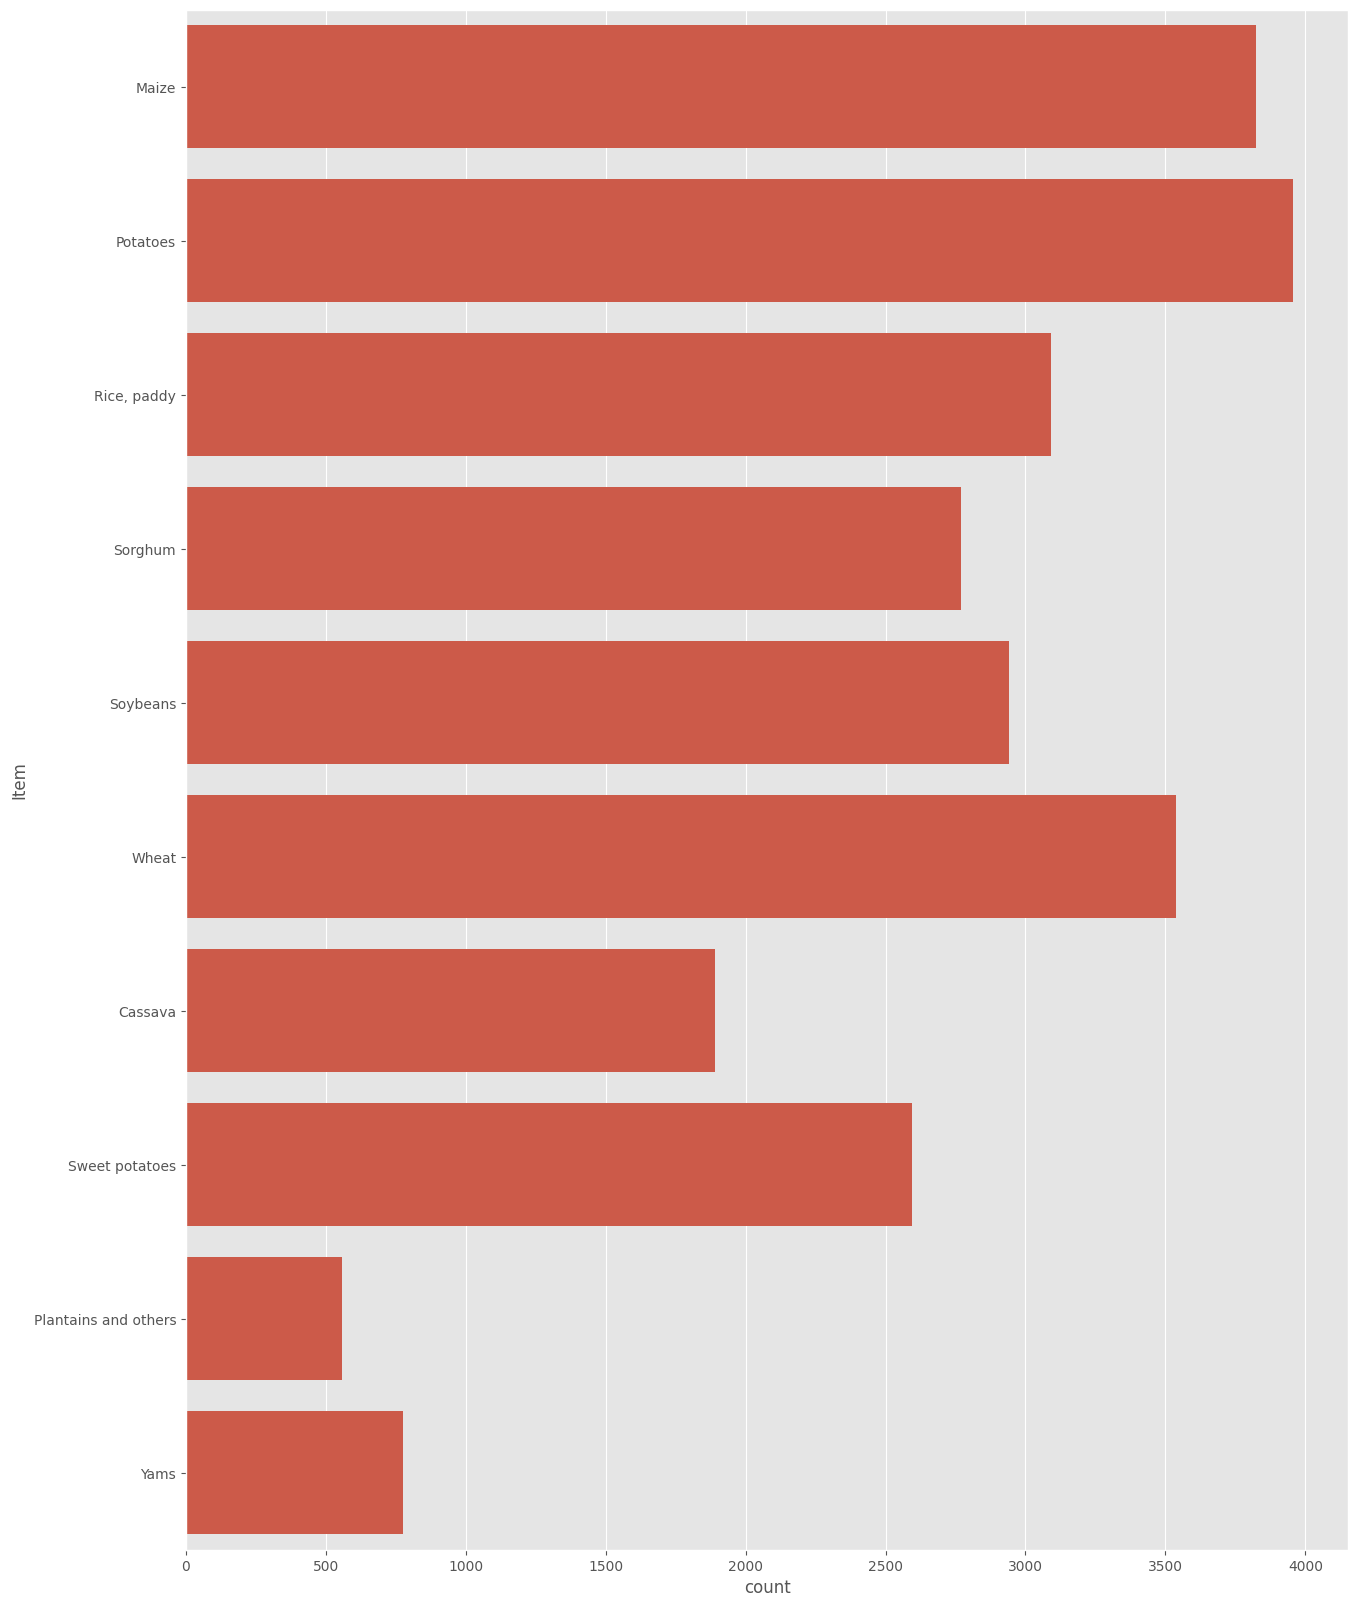

In [19]:
plt.figure(figsize=(15,20))
sns.countplot(y= df['Item'])
plt.show()

In [20]:
(df['Area'].value_counts() < 400).sum()


np.int64(88)

In [21]:
country=df['Area'].unique()
yield_per_country=[]
for state in country:
    yield_per_country.append(df[df['Area']==state]['hg/ha_yield'])

In [22]:
df['hg/ha_yield'].sum()

np.int64(1996196943)

In [23]:
yield_per_country

[0      36613
 1      66667
 2      23333
 3      12500
 4       7000
        ...  
 94     41096
 95     69533
 96    260110
 97     10000
 98     41292
 Name: hg/ha_yield, Length: 99, dtype: int64,
 99      16500
 100     78936
 101     28000
 102     16571
 103      6315
         ...  
 208     33649
 209    303218
 210     17778
 211     60000
 212     19100
 Name: hg/ha_yield, Length: 114, dtype: int64,
 213    41177
 214     2736
 215    40000
 216     9512
 217    89342
        ...  
 372    12744
 373     2415
 374     4405
 375    73409
 376     9022
 Name: hg/ha_yield, Length: 164, dtype: int64,
 377    100000
 378    100000
 379     34608
 380     34608
 381    202747
         ...  
 740     25391
 741    147498
 742    147498
 743     26581
 744     26581
 Name: hg/ha_yield, Length: 368, dtype: int64,
 745     32344
 746    111301
 747     21600
 748     32261
 749    134416
         ...  
 803    207151
 804     26010
 805     67114
 806    215290
 807     31273
 Name: hg/

In [24]:
print(type(yield_per_country), len(yield_per_country))
print(type(country), len(country))


<class 'list'> 101
<class 'numpy.ndarray'> 101


In [25]:
print(yield_per_country[:5])
print(country[:5])


[0      36613
1      66667
2      23333
3      12500
4       7000
       ...  
94     41096
95     69533
96    260110
97     10000
98     41292
Name: hg/ha_yield, Length: 99, dtype: int64, 99      16500
100     78936
101     28000
102     16571
103      6315
        ...  
208     33649
209    303218
210     17778
211     60000
212     19100
Name: hg/ha_yield, Length: 114, dtype: int64, 213    41177
214     2736
215    40000
216     9512
217    89342
       ...  
372    12744
373     2415
374     4405
375    73409
376     9022
Name: hg/ha_yield, Length: 164, dtype: int64, 377    100000
378    100000
379     34608
380     34608
381    202747
        ...  
740     25391
741    147498
742    147498
743     26581
744     26581
Name: hg/ha_yield, Length: 368, dtype: int64, 745     32344
746    111301
747     21600
748     32261
749    134416
        ...  
803    207151
804     26010
805     67114
806    215290
807     31273
Name: hg/ha_yield, Length: 63, dtype: int64]
['Albania' 'Algeria' 'A

In [26]:
flat_yield = pd.concat(yield_per_country).reset_index(drop=True)

# Country list tumne diya hai, assume it's a flat list too
# Check if lengths match
print(len(flat_yield), len(country))  # They should be equal


25932 101


In [27]:
print(df.columns)


Index(['Area', 'Item', 'Year', 'hg/ha_yield', 'average_rain_fall_mm_per_year',
       'pesticides_tonnes', 'avg_temp'],
      dtype='object')


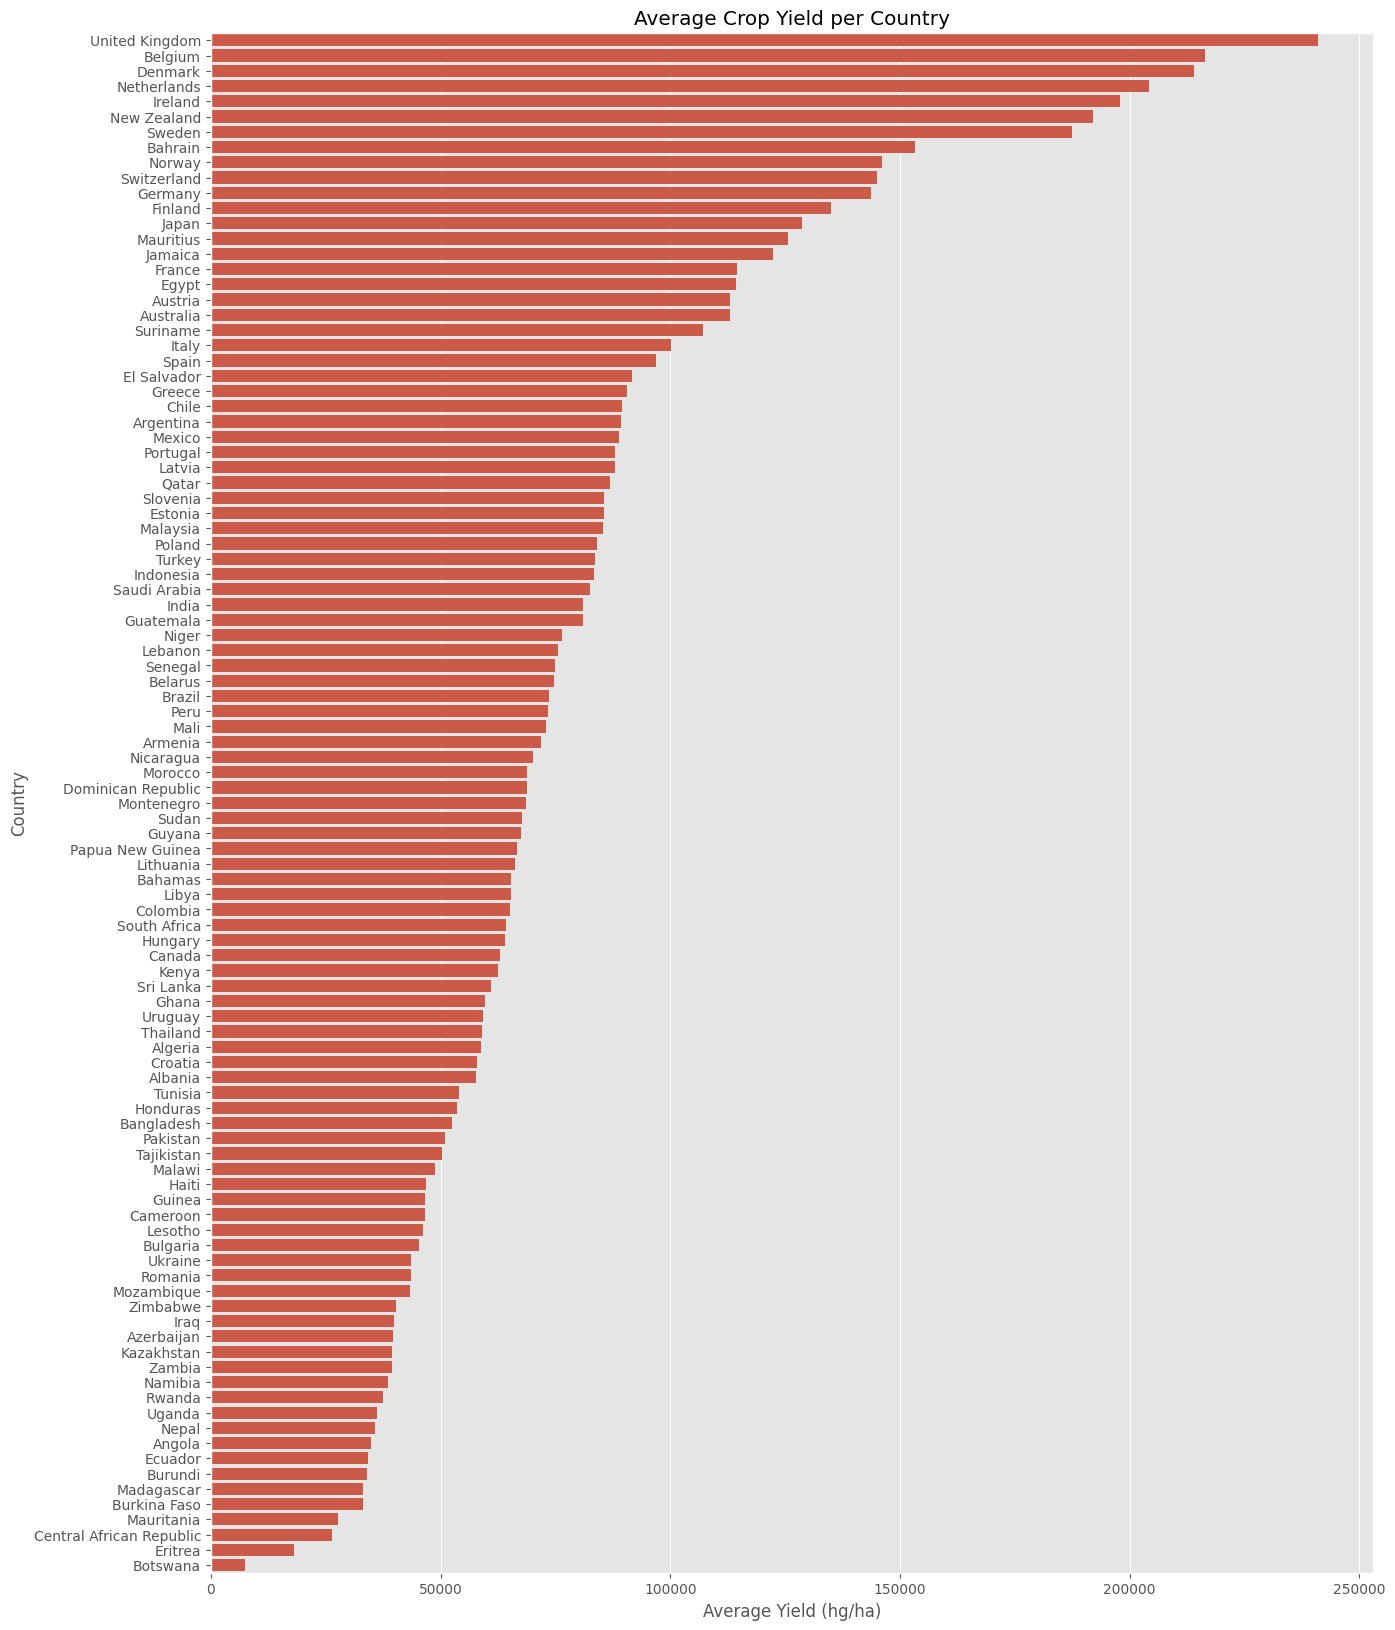

In [28]:
country_yield = df.groupby('Area')['hg/ha_yield'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(15, 20))
sns.barplot(x=country_yield.values, y=country_yield.index)
plt.xlabel("Average Yield (hg/ha)")
plt.ylabel("Country")
plt.title("Average Crop Yield per Country")
plt.show()

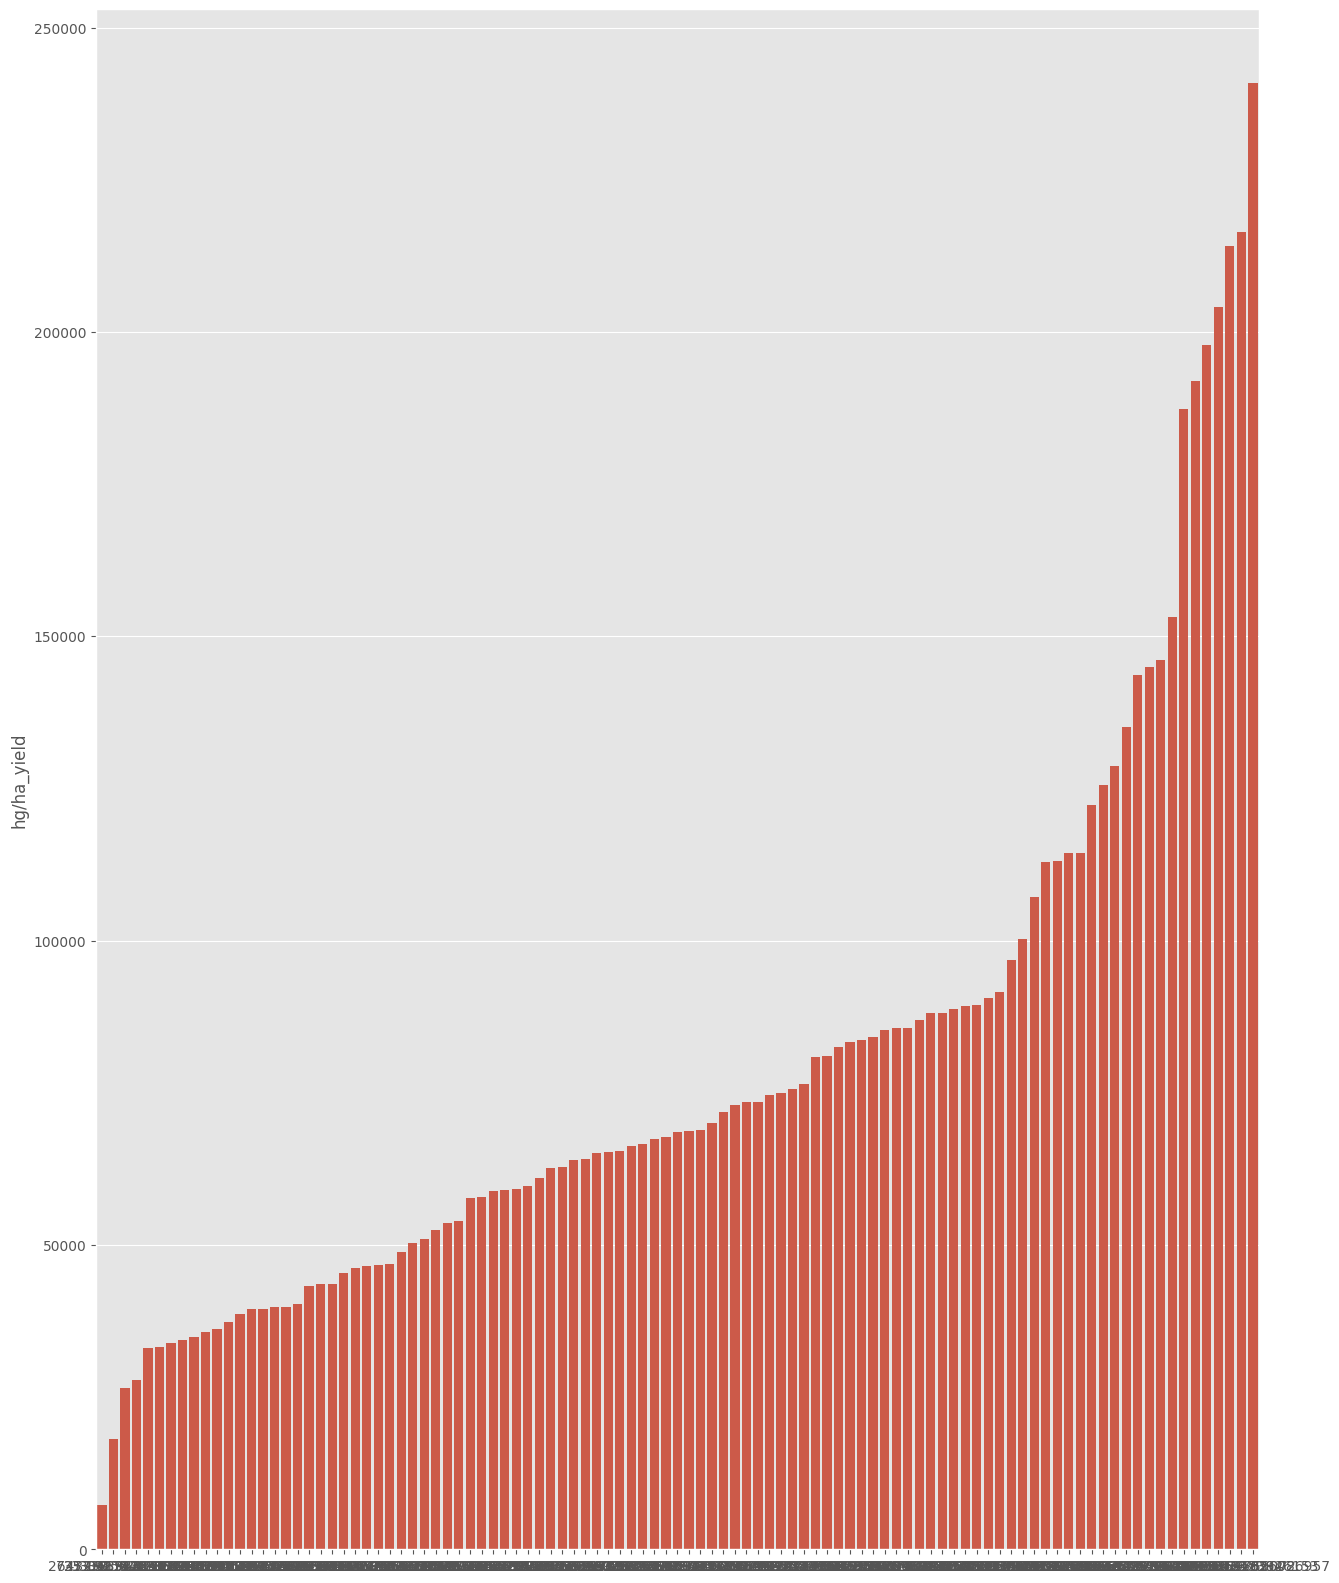

In [29]:
plt.figure(figsize=(15, 20))
sns.barplot(x=country_yield.values, y=country_yield)
plt.show()

In [30]:
crops=df['Item'].unique()
yield_per_crop=[]
for crop in crops:
    yield_per_crop.append(df[df['Item']==crop]['hg/ha_yield'].sum())

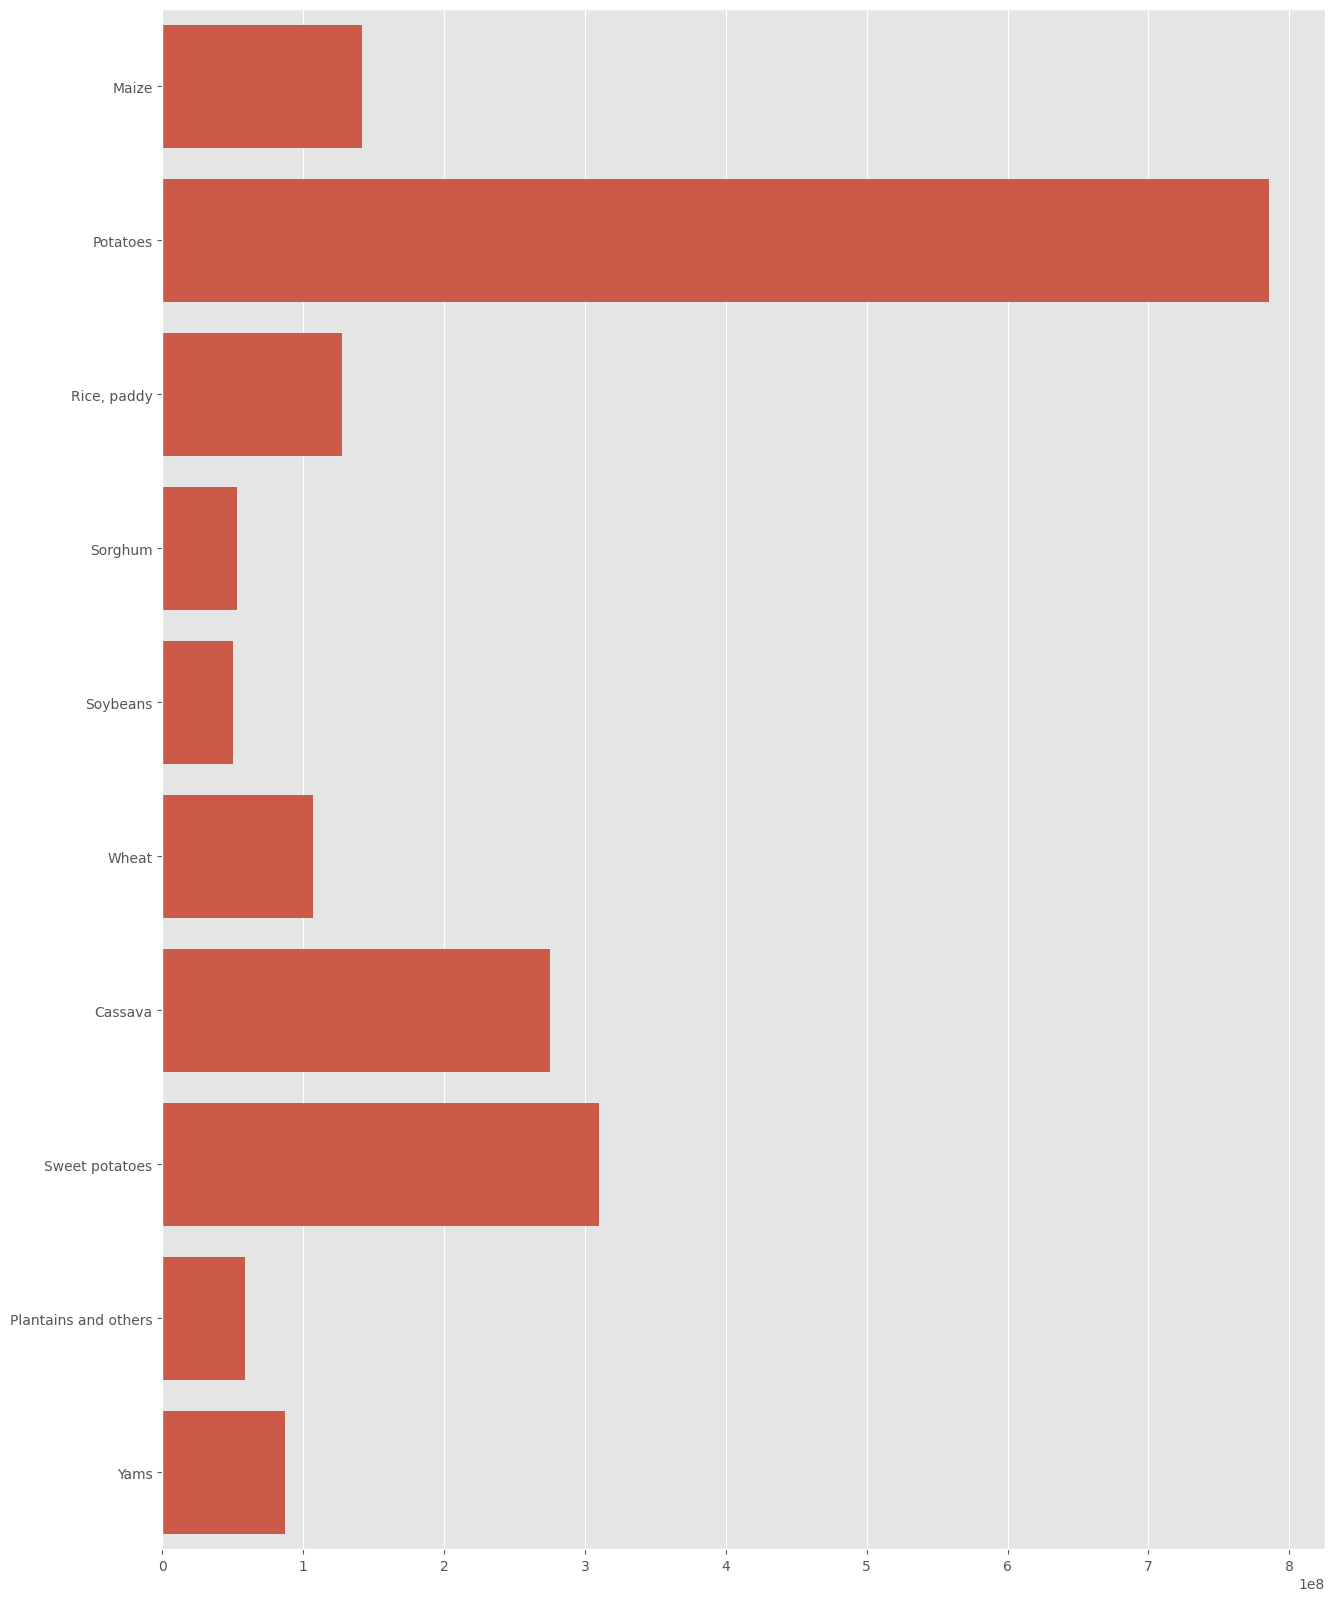

In [31]:
plt.figure(figsize=(15,20))
sns.barplot(y=crops,x=yield_per_crop)
plt.show()

In [32]:
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [33]:
df.columns

Index(['Area', 'Item', 'Year', 'hg/ha_yield', 'average_rain_fall_mm_per_year',
       'pesticides_tonnes', 'avg_temp'],
      dtype='object')

In [34]:
col = ['Year','average_rain_fall_mm_per_year','pesticides_tonnes', 'avg_temp','Area', 'Item', 'hg/ha_yield']

In [35]:
df = df[col]

In [36]:
df.head()

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item,hg/ha_yield
0,1990,1485.0,121.0,16.37,Albania,Maize,36613
1,1990,1485.0,121.0,16.37,Albania,Potatoes,66667
2,1990,1485.0,121.0,16.37,Albania,"Rice, paddy",23333
3,1990,1485.0,121.0,16.37,Albania,Sorghum,12500
4,1990,1485.0,121.0,16.37,Albania,Soybeans,7000


In [37]:
X = df.drop('hg/ha_yield', axis = 1)
y = df['hg/ha_yield']

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0, shuffle=True)

In [39]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ohe = OneHotEncoder(drop = 'first')
scale = StandardScaler()

preprocesser = ColumnTransformer(
    transformers = [
        ('StandardScale', scale, [0,1,2,3]),
        ('OneHotEncode', ohe, [4,5])
    ], 
    remainder = 'passthrough'
) 

In [40]:
X_train_dummy = preprocesser.fit_transform(X_train)
X_test_dummy  = preprocesser.fit_transform(X_test)

In [41]:
preprocesser.get_feature_names_out(col[:-1])

array(['StandardScale__Year',
       'StandardScale__average_rain_fall_mm_per_year',
       'StandardScale__pesticides_tonnes', 'StandardScale__avg_temp',
       'OneHotEncode__Area_Algeria', 'OneHotEncode__Area_Angola',
       'OneHotEncode__Area_Argentina', 'OneHotEncode__Area_Armenia',
       'OneHotEncode__Area_Australia', 'OneHotEncode__Area_Austria',
       'OneHotEncode__Area_Azerbaijan', 'OneHotEncode__Area_Bahamas',
       'OneHotEncode__Area_Bahrain', 'OneHotEncode__Area_Bangladesh',
       'OneHotEncode__Area_Belarus', 'OneHotEncode__Area_Belgium',
       'OneHotEncode__Area_Botswana', 'OneHotEncode__Area_Brazil',
       'OneHotEncode__Area_Bulgaria', 'OneHotEncode__Area_Burkina Faso',
       'OneHotEncode__Area_Burundi', 'OneHotEncode__Area_Cameroon',
       'OneHotEncode__Area_Canada',
       'OneHotEncode__Area_Central African Republic',
       'OneHotEncode__Area_Chile', 'OneHotEncode__Area_Colombia',
       'OneHotEncode__Area_Croatia', 'OneHotEncode__Area_Denmark',
   

In [42]:

from sklearn.linear_model import LinearRegression,Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score



In [43]:
import scipy
print(scipy.__version__)

1.15.2


In [44]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

models = {
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(max_iter=10000),
    'Ridge': Ridge(solver='lsqr'),
    'Decision Tree': DecisionTreeRegressor(),
    'KNN': KNeighborsRegressor()
}



In [45]:
from sklearn.metrics import mean_absolute_error, r2_score

for name, model in models.items():
    model.fit(X_train_dummy, y_train)
    y_pred = model.predict(X_test_dummy)
    print(f"{name}: MAE = {mean_absolute_error(y_test, y_pred):.2f}, R² = {r2_score(y_test, y_pred):.2f}")


Linear Regression: MAE = 29897.26, R² = 0.75
Lasso: MAE = 29883.83, R² = 0.75
Ridge: MAE = 29849.53, R² = 0.75
Decision Tree: MAE = 5666.27, R² = 0.97
KNN: MAE = 4679.18, R² = 0.98


In [46]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train_dummy,y_train)
dtr.predict(X_test_dummy)

array([35286., 22814., 19295., ..., 16135., 34879., 77391.], shape=(5187,))

In [47]:
df.columns

Index(['Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes',
       'avg_temp', 'Area', 'Item', 'hg/ha_yield'],
      dtype='object')

In [48]:
df.head()

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item,hg/ha_yield
0,1990,1485.0,121.0,16.37,Albania,Maize,36613
1,1990,1485.0,121.0,16.37,Albania,Potatoes,66667
2,1990,1485.0,121.0,16.37,Albania,"Rice, paddy",23333
3,1990,1485.0,121.0,16.37,Albania,Sorghum,12500
4,1990,1485.0,121.0,16.37,Albania,Soybeans,7000


In [49]:
# Predictive System

In [50]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [51]:
X = df.drop(columns='hg/ha_yield')
y = df['hg/ha_yield']


In [52]:
# Numerical and categorical columns
num_features = ['Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']
cat_features = ['Area', 'Item']

# Column transformer
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
])


In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle
import os

def load_and_preprocess_data(filepath):
    """
    Load and preprocess the crop yield dataset
    """
    try:
        # Check if file exists
        if not os.path.exists(filepath):
            raise FileNotFoundError(f"Dataset file not found at: {filepath}")
            
        # Load the dataset
        df = pd.read_csv(filepath)
        
        # Verify required columns exist
        required_columns = ['Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp', 'hg/ha_yield']
        missing_columns = [col for col in required_columns if col not in df.columns]
        if missing_columns:
            raise ValueError(f"Missing required columns: {missing_columns}")
        
        # Select features for prediction
        features = ['Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']
        X = df[features]
        y = df['hg/ha_yield']
        
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42
        )
        
        # Scale the features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        # Create directory for models if it doesn't exist
        os.makedirs('models', exist_ok=True)
        
        # Save the scaler
        with open('models/preprocessor.pkl', 'wb') as f:
            pickle.dump(scaler, f)
        
        return X_train_scaled, X_test_scaled, y_train, y_test
        
    except Exception as e:
        print(f"Error in data preprocessing: {str(e)}")
        raise

def main():
    """
    Main function to prepare the data
    """
    try:
        # Update this path to your CSV file location
        current_dir = os.path.dirname(os.path.abspath(__file__))
        data_file = os.path.join(current_dir, "crop_yield_data.csv")
        
        X_train, X_test, y_train, y_test = load_and_preprocess_data(data_file)
        print("Data preprocessing completed successfully!")
        print(f"Training set shape: {X_train.shape}")
        print(f"Test set shape: {X_test.shape}")
        
        # Save processed data
        np.save('models/X_train.npy', X_train)
        np.save('models/X_test.npy', X_test)
        np.save('models/y_train.npy', y_train)
        np.save('models/y_test.npy', y_test)
        print("Processed data saved successfully!")
        
    except Exception as e:
        print(f"Error in main function: {str(e)}")

if __name__ == "__main__":
    main()

Error in main function: name '__file__' is not defined


In [54]:
from sklearn.ensemble import RandomForestRegressor

model_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Year',
                                                   'average_rain_fall_mm_per_year',
                                                   'pesticides_tonnes',
                                                   'avg_temp']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Area', 'Item'])])),
                ('model', RandomForestRegressor(random_state=42))])

In [56]:
def prediction(year, rain, pesticide, temp, area, crop):
    input_df = pd.DataFrame([{
        'Year': year,
        'average_rain_fall_mm_per_year': rain,
        'pesticides_tonnes': pesticide,
        'avg_temp': temp,
        'Area': area,
        'Item': crop
    }])
    return model_pipeline.predict(input_df)[0]

result = prediction(1990, 1485.0, 121.0, 16.37, 'Albania', 'Maize')
print(f"Predicted Crop Yield: {result}")


Predicted Crop Yield: 33096.42


In [57]:
result = prediction(1990, 1485.0, 121.0, 16.37, 'Albania', 'Maize')
print(result)

33096.42


In [58]:
import pickle

pickle.dump(model_pipeline, open("model_pipeline.pkl", "wb"))


In [59]:
import pandas as pd

test_data = pd.read_csv("yield_df.csv")  # Make sure the filename is correct


In [62]:
import pickle

model_pipeline = pickle.load(open("model_pipeline.pkl", "rb"))


In [63]:
predictions = model_pipeline.predict(test_data)
predictions = model_pipeline.predict(test_data)



In [64]:
import pandas as pd

submission = pd.DataFrame({
    'Id': test_data.index,       # This will just use row numbers as ID
    'Prediction': predictions
})

submission.to_csv("submission.csv", index=False)


In [65]:
# Check the first few rows of the submission
submission.head()


,Id,Prediction
0,0,33096.42
1,1,72473.93
2,2,27685.47
3,3,12566.23
4,4,7244.00


In [66]:
submission.to_csv("submission.csv", index=False)


In [67]:
#modl traning and evaluation

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train_dummy, y_train)

y_pred = model.predict(X_test_dummy)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R² Score:", r2)


MSE: 7270013483.828104
R² Score: -0.003052259219087805


In [69]:
# Visualize Prediction Performance

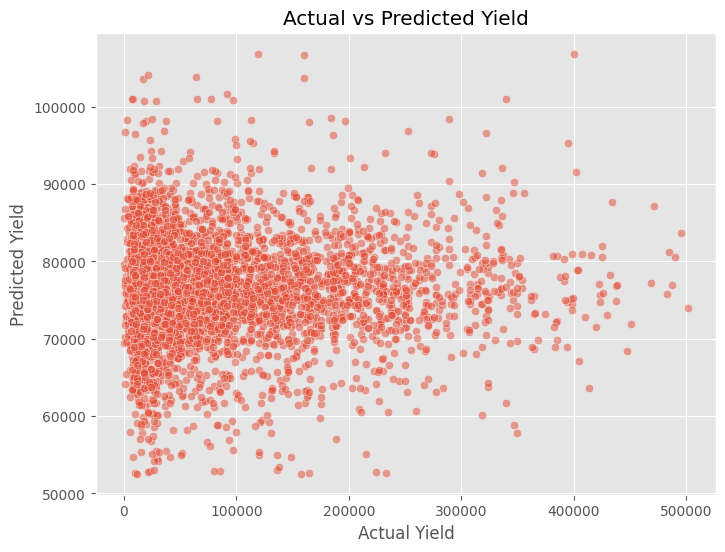

In [70]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")
plt.title("Actual vs Predicted Yield")
plt.show()


In [71]:
#Feature Importance (if using tree-based models)

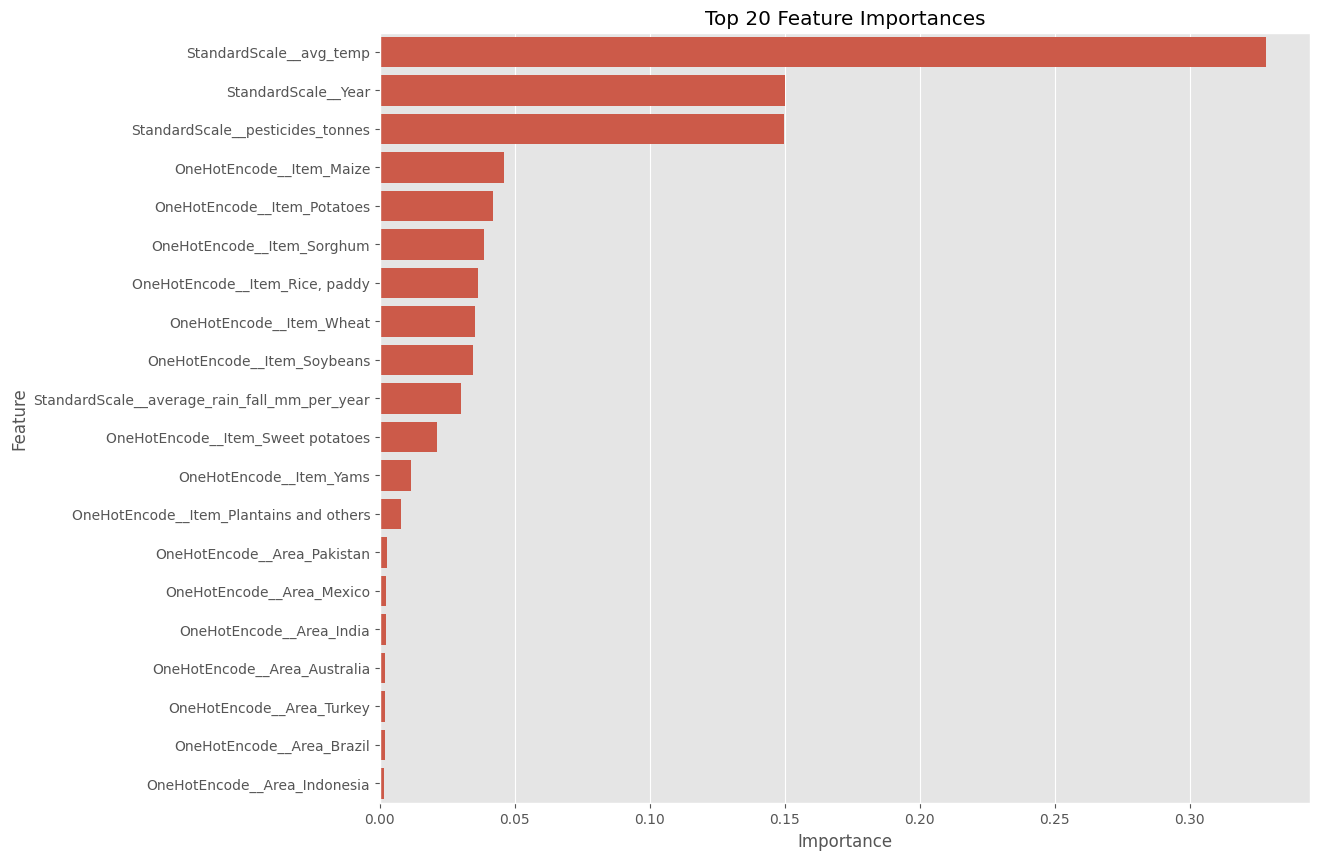

In [72]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train_dummy, y_train)

importances = rf.feature_importances_
features = preprocesser.get_feature_names_out(col[:-1])

importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12,10))
sns.barplot(data=importance_df.head(20), x='Importance', y='Feature')
plt.title("Top 20 Feature Importances")
plt.show()


In [73]:

result = prediction(2000, 2485.0, 128.0, 20.37, 'Albania', 'Potatoes')
print(f"Predicted Crop Yield: {result}")


Predicted Crop Yield: 70990.6
